<a href="https://colab.research.google.com/github/tcbic/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statistics
import math

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [64]:
#Find the mean.

mean_of_sales = sum(sales)/len(sales)

mean_of_sales

3052.714285714286

In [0]:
#Find the variance.

#The distance between each point and the corresponding mean.

dist = [x - mean_of_sales for x in sales]

In [0]:
#Square the distances from the mean.

def square(list):
    return [i ** 2 for i in list]

square_dist = square(dist)

In [67]:
#Finally, sum the squared distances and divide by the number of observations.

observations = len(sales)

var_of_sales = sum(square_dist)/(observations-1)

var_of_sales

214387.90476190473

In [68]:
#Shorter way to find the variance...

var = sum((xi - mean_of_sales) ** 2 for xi in sales) / (len(sales) - 1)

var

214387.90476190473

In [69]:
#Find the standard deviation.

stdv_of_sales = var_of_sales**.5

stdv_of_sales

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [70]:
#Covariance measures how changes in one variable are associated with changes in another variable(how they move in relation to eachother).

num_of_customers = [127, 80, 105, 92, 120, 115, 93]

cov = np.cov(sales, num_of_customers)

cov

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [71]:
#Find the standard deviation of customers.

#Mean

mean_of_customers = sum(num_of_customers)/len(num_of_customers)

mean_of_customers

104.57142857142857

In [72]:
#Variance

var_of_customers = sum((xi - mean_of_customers) ** 2 for xi in num_of_customers) / (len(num_of_customers) - 1)

var_of_customers

290.95238095238096

In [73]:
#Standard deviation

stdv_of_customers = var_of_customers**.5

stdv_of_customers

17.057326313123664

In [80]:
#Find the correlation coefficient.

#Correlation coefficient measures the strength of the linear relationship.

corr_coef = np.cov(sales, num_of_customers) / np.array([[stdv_of_sales*stdv_of_sales, stdv_of_sales*stdv_of_customers], 
                                                       [stdv_of_customers*stdv_of_sales, stdv_of_customers*stdv_of_customers]])

corr_coef

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [75]:
#Verify the correlation coefficient.

np.corrcoef(sales, num_of_customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [89]:
titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic_df = titanic_df.drop(columns=['Unnamed: 0'])

In [91]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [92]:
#Create a separate dataframe for numeric variables only.

numeric_titanic_df = titanic_df.drop(columns=['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'])

numeric_titanic_df.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [93]:
#Calculate the variance-covariance matrix.

numeric_titanic_df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [95]:
#Calculate the correlation matrix.

numeric_titanic_df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

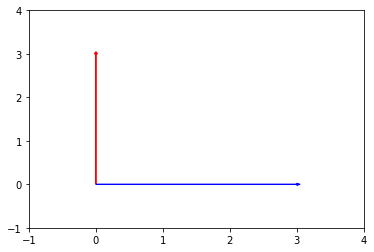

In [0]:
#Plot of two orthogonal vectors.

g = [0, 3]

h = [3, 0] 


plt.arrow(0, 0, 0, 3, head_width=.05, head_length=.05 , color='r')
plt.arrow(0, 0, 3, 0, head_width=.05, head_length=.05 , color='b')
plt.xlim(-1,4)          
plt.ylim(-1,4);

In [0]:
#The dot product of these two vectors is equal to zero which means these two vectors are orthogonal to each other.

print(np.dot(g, h))

0


In [0]:
#Another word for orthogonal is perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5, 3, 7]

b = [6, -8, 2]

np.dot(a, b)

-40

In [0]:
#We see that these two vectors are not orthogonal to each other as the dot product results in an output other than 0.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [76]:
#Find the length of c.

c = np.array([2, -15, 6, 20])

length_of_c = np.linalg.norm(c)

#The length of c squared.

length_of_c**2

665.0

In [77]:
#What is the dot product of c and c?

np.dot(c, c)

665

In [78]:
#What is cT*c?

np.matmul(c.T, c)

665

In [0]:
#In this case, we see that all of these quantities are the same.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

**Vector d as a linear combination of scalars and unit vectors:**

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

**Vector e as a linear combination of scalars and unit vectors:**

\begin{align}
e = \begin{bmatrix} 2\\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0\\0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix} + -8\begin{bmatrix}0\\0\\1\end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])

In [100]:
#First, find the norm(length) of f.

length_of_f = np.linalg.norm(f)

length_of_f

19.131126469708992

In [101]:
f_hat = (1/length_of_f)*f

f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [103]:
#Verify that this is a unit vector. A unit vector has a norm of 1.

np.linalg.norm(f_hat)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

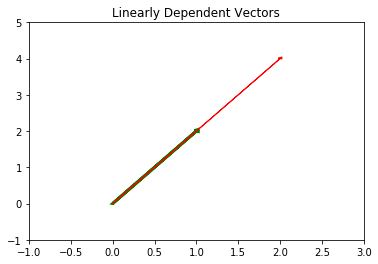

In [0]:
#These two vectors are linearly dependent.

vec_1_dep = [1, 2]

vec_2_dep = np.multiply(2, vec_1_dep)

plt.arrow(0, 0, 1, 2, linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, vec_2_dep[0], vec_2_dep[1], linewidth=1, head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1,3)          
plt.ylim(-1,5)
plt.title("Linearly Dependent Vectors");

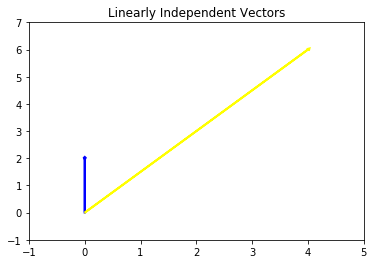

In [0]:
#These two vectors are linearly independent.

vec_1_ind = [0, 2]

vec_2_ind = [4, 6]

plt.arrow(0, 0, 0, 2, linewidth=2, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0, 0, vec_2_ind[0], vec_2_ind[1], linewidth=2, head_width=.05, head_length=0.05, color ='yellow')
plt.xlim(-1,5)          
plt.ylim(-1,7)
plt.title("Linearly Independent Vectors");

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

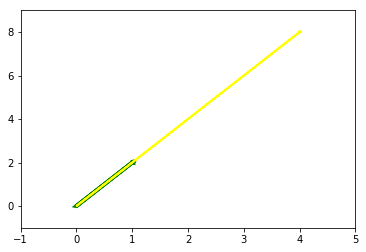

In [0]:
#Plot these two vectors.

g_5 = [1, 2]

h_5 = [4, 8]

plt.arrow(0, 0, 1, 2, linewidth=4, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, 4, 8, linewidth=2, head_width=.05, head_length=0.05, color ='yellow')
plt.xlim(-1,5)          
plt.ylim(-1,9);

#Based on our plot, we observe that these two vectors are linearly dependent; they are on the same line and, hence span one-dimensional space.

In [107]:
#By checking the rank, we can verify the span of the matrix. 

g_h_matrix = np.array([[1, 2], [4, 8]])

np.linalg.matrix_rank(g_h_matrix)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

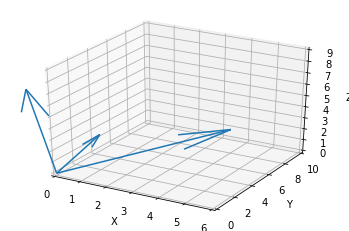

In [104]:
from mpl_toolkits.mplot3d import Axes3D

l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

vectors = np.array([[0, 0, 0, 1, 2, 3], [0, 0, 0, -1, 0, 7], [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 6])
ax.set_ylim([0, 10])
ax.set_zlim([0, 9])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [0]:
#We observe that these three vectors are linearly independent and span three-dimensional space.

In [108]:
#By checking the rank, we can verify the span of the matrix.

l_m_n_matrix = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

np.linalg.matrix_rank(l_m_n_matrix)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



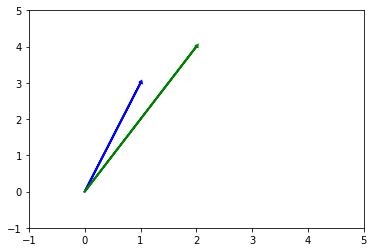

In [0]:
vector1 = [1, 3]

vector2 = [2, 4]

plt.arrow(0, 0, 1, 3, linewidth=2, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0, 0, 2, 4, linewidth=2, head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5);

## 6.2 What does it mean to form a basis?

To form a basis means to represent linear independence(don't lie on the same line) and span that space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [105]:
#Find the rank of P.

P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns. Based on the rank of the above matrix, we could say that the vectors that comprise that matrix are linearly independent and span three-dimensional space.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

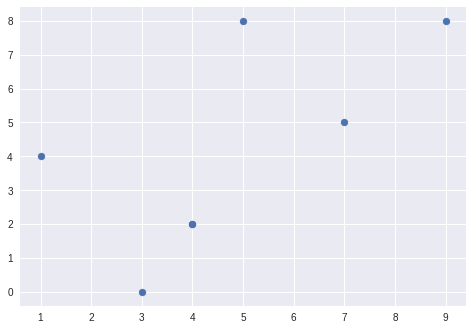

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()